In [1]:
"""

This is for B/D estimation of galaxies by CNN,
By Kenji Bekki, on 2018/3/30
For test only.

"""


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.models import model_from_json
import keras.callbacks
import numpy as np
#import keras.backend.tensorflow_backend as KTF
#import tensorflow as tf
import os.path


### Original values
#batch_size = 128
#num_classes = 10
#epochs = 12
#batch_size = 200
#num_classes = 3
#epochs = 1
#nb_epoch=epochs

n_mesh=50
#n_mesh=20

img_rows, img_cols = n_mesh, n_mesh
n_mesh2=n_mesh*n_mesh-1
n_mesh3=n_mesh*n_mesh

#input_shape = (img_rows, img_cols, 1)

# For output the galaxy classification results
f1=open('test27.out','w')

# This is for simlation data sets
with open('2dft.dat') as f:
  lines=f.readlines()

#nmodel0=int(input('Input the total number of images per model '))
#nmodel=nmodel0
nmodel=1000
print('nmodel',nmodel)

#nmodel=30000

x_train=np.zeros((nmodel,n_mesh3))
x_test=np.zeros((nmodel,n_mesh3))
y_train=np.zeros(nmodel,dtype=np.int)
y_test=np.zeros(nmodel,dtype=np.int)



#y_test=np.zeros(nmodel)
#print(y_train)

# For 2D density map data
ibin=0
jbin=-1
for num,j in enumerate(lines):
  jbin=jbin+1
  tm=j.strip().split()
  x_train[ibin,jbin]=float(tm[0])
  x_test[ibin,jbin]=float(tm[0])
#  print('ibin,jbin',ibin,jbin)
  if jbin == n_mesh2:
    ibin+=1
    jbin=-1

ntest=ibin
print(ntest)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
#y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)


# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

y_vec=np.zeros(2)
#print(y_vec)

y_pred=loaded_model.predict(x_test)
print(y_pred[:ntest])

f1.write( str(ntest) + "\n" )

for i in range(ntest):
  for j in range(2):
   y_vec[j]=y_pred[i,j]
#  print(y_vec)
#  y_type=np.argmax(y_vec)
#  prob=y_vec[y_type]
   prob=y_vec[j]
   print('i=',i,'j',j,'B/D',prob)
#   f1.write( str(prob) +"\n" )
#  f1.write( str(y_type) + ' ' + str(prob) +"\n" )
  f1.write( str(y_vec[0]) + ' ' + str(y_vec[1]) +  "\n")
#  str(y_vec[1]) + "\n" )
#  str(y_vec[1]) + ' ' + str(y_vec[2]) + "\n" )
f1.flush()
#loaded_model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])





nmodel 1000
1000
Loaded model from disk
[[5.206438  3.935458 ]
 [5.227441  3.8989065]
 [5.213433  3.850734 ]
 ...
 [4.919594  4.5310655]
 [4.8298264 4.375994 ]
 [4.7296762 4.427512 ]]
i= 0 j 0 B/D 5.206438064575195
i= 0 j 1 B/D 3.935457944869995
i= 1 j 0 B/D 5.22744083404541
i= 1 j 1 B/D 3.8989064693450928
i= 2 j 0 B/D 5.213432788848877
i= 2 j 1 B/D 3.850733995437622
i= 3 j 0 B/D 5.261016845703125
i= 3 j 1 B/D 3.815105676651001
i= 4 j 0 B/D 5.259987831115723
i= 4 j 1 B/D 3.4705896377563477
i= 5 j 0 B/D 5.198042392730713
i= 5 j 1 B/D 3.612076997756958
i= 6 j 0 B/D 5.149853229522705
i= 6 j 1 B/D 3.4020793437957764
i= 7 j 0 B/D 5.039361953735352
i= 7 j 1 B/D 3.5131611824035645
i= 8 j 0 B/D 4.886878967285156
i= 8 j 1 B/D 3.4816486835479736
i= 9 j 0 B/D 4.8028364181518555
i= 9 j 1 B/D 3.513777494430542
i= 10 j 0 B/D 3.197779893875122
i= 10 j 1 B/D 9.381918907165527
i= 11 j 0 B/D 3.2145724296569824
i= 11 j 1 B/D 9.360426902770996
i= 12 j 0 B/D 3.4589426517486572
i= 12 j 1 B/D 9.2390508651733

i= 185 j 1 B/D 7.3461480140686035
i= 186 j 0 B/D 5.010524749755859
i= 186 j 1 B/D 5.996128082275391
i= 187 j 0 B/D 4.850283622741699
i= 187 j 1 B/D 6.2269511222839355
i= 188 j 0 B/D 4.862274646759033
i= 188 j 1 B/D 5.586211204528809
i= 189 j 0 B/D 4.689633846282959
i= 189 j 1 B/D 5.734198570251465
i= 190 j 0 B/D 5.429776191711426
i= 190 j 1 B/D 2.5461463928222656
i= 191 j 0 B/D 5.450127124786377
i= 191 j 1 B/D 2.513441801071167
i= 192 j 0 B/D 5.411988735198975
i= 192 j 1 B/D 2.539348840713501
i= 193 j 0 B/D 5.457701683044434
i= 193 j 1 B/D 2.5067529678344727
i= 194 j 0 B/D 5.396964073181152
i= 194 j 1 B/D 2.3599886894226074
i= 195 j 0 B/D 5.339632511138916
i= 195 j 1 B/D 2.488783121109009
i= 196 j 0 B/D 5.221855640411377
i= 196 j 1 B/D 2.4684717655181885
i= 197 j 0 B/D 5.119723320007324
i= 197 j 1 B/D 2.561340808868408
i= 198 j 0 B/D 4.906316757202148
i= 198 j 1 B/D 2.656674861907959
i= 199 j 0 B/D 4.835016250610352
i= 199 j 1 B/D 2.6755921840667725
i= 200 j 0 B/D 4.708281517028809
i= 

i= 380 j 1 B/D 4.4794440269470215
i= 381 j 0 B/D 5.360836029052734
i= 381 j 1 B/D 4.44809627532959
i= 382 j 0 B/D 5.3691606521606445
i= 382 j 1 B/D 4.268491744995117
i= 383 j 0 B/D 5.411280632019043
i= 383 j 1 B/D 4.241296768188477
i= 384 j 0 B/D 5.462355136871338
i= 384 j 1 B/D 3.595017433166504
i= 385 j 0 B/D 5.390885829925537
i= 385 j 1 B/D 3.7506425380706787
i= 386 j 0 B/D 5.365727424621582
i= 386 j 1 B/D 3.313856363296509
i= 387 j 0 B/D 5.233496189117432
i= 387 j 1 B/D 3.438870429992676
i= 388 j 0 B/D 5.049374580383301
i= 388 j 1 B/D 3.3720152378082275
i= 389 j 0 B/D 4.935401916503906
i= 389 j 1 B/D 3.415592908859253
i= 390 j 0 B/D 5.431840896606445
i= 390 j 1 B/D 2.610734701156616
i= 391 j 0 B/D 5.452463150024414
i= 391 j 1 B/D 2.579925775527954
i= 392 j 0 B/D 5.416066646575928
i= 392 j 1 B/D 2.5969619750976562
i= 393 j 0 B/D 5.461668014526367
i= 393 j 1 B/D 2.564988851547241
i= 394 j 0 B/D 5.40560245513916
i= 394 j 1 B/D 2.397507429122925
i= 395 j 0 B/D 5.3470282554626465
i= 395

i= 570 j 0 B/D 4.903443336486816
i= 570 j 1 B/D 5.329204559326172
i= 571 j 0 B/D 4.924442291259766
i= 571 j 1 B/D 5.300567626953125
i= 572 j 0 B/D 4.932123184204102
i= 572 j 1 B/D 5.205767631530762
i= 573 j 0 B/D 4.979239463806152
i= 573 j 1 B/D 5.180320739746094
i= 574 j 0 B/D 5.038718223571777
i= 574 j 1 B/D 4.656952381134033
i= 575 j 0 B/D 4.975720405578613
i= 575 j 1 B/D 4.811861515045166
i= 576 j 0 B/D 5.003172874450684
i= 576 j 1 B/D 4.4121551513671875
i= 577 j 0 B/D 4.8889689445495605
i= 577 j 1 B/D 4.5407938957214355
i= 578 j 0 B/D 4.803652286529541
i= 578 j 1 B/D 4.395481109619141
i= 579 j 0 B/D 4.708340644836426
i= 579 j 1 B/D 4.444707870483398
i= 580 j 0 B/D 5.25248908996582
i= 580 j 1 B/D 3.33697772026062
i= 581 j 0 B/D 5.273826599121094
i= 581 j 1 B/D 3.302170753479004
i= 582 j 0 B/D 5.246965408325195
i= 582 j 1 B/D 3.3075132369995117
i= 583 j 0 B/D 5.294069290161133
i= 583 j 1 B/D 3.27968430519104
i= 584 j 0 B/D 5.2619171142578125
i= 584 j 1 B/D 3.0622832775115967
i= 585 

i= 760 j 1 B/D 2.5143930912017822
i= 761 j 0 B/D 5.3475728034973145
i= 761 j 1 B/D 2.4822070598602295
i= 762 j 0 B/D 5.304876327514648
i= 762 j 1 B/D 2.549057722091675
i= 763 j 0 B/D 5.351428031921387
i= 763 j 1 B/D 2.517362117767334
i= 764 j 0 B/D 5.280489921569824
i= 764 j 1 B/D 2.4437344074249268
i= 765 j 0 B/D 5.22705602645874
i= 765 j 1 B/D 2.5729544162750244
i= 766 j 0 B/D 5.113620758056641
i= 766 j 1 B/D 2.582449197769165
i= 767 j 0 B/D 5.019562721252441
i= 767 j 1 B/D 2.675840377807617
i= 768 j 0 B/D 4.825230598449707
i= 768 j 1 B/D 2.756058931350708
i= 769 j 0 B/D 4.763837814331055
i= 769 j 1 B/D 2.775609254837036
i= 770 j 0 B/D 5.273005485534668
i= 770 j 1 B/D 3.0940663814544678
i= 771 j 0 B/D 5.293564796447754
i= 771 j 1 B/D 3.0635101795196533
i= 772 j 0 B/D 5.261185646057129
i= 772 j 1 B/D 3.0865368843078613
i= 773 j 0 B/D 5.308388710021973
i= 773 j 1 B/D 3.055800437927246
i= 774 j 0 B/D 5.264819145202637
i= 774 j 1 B/D 2.889897584915161
i= 775 j 0 B/D 5.20845890045166
i= 7

i= 953 j 1 B/D 3.1055009365081787
i= 954 j 0 B/D 5.357141494750977
i= 954 j 1 B/D 2.851867914199829
i= 955 j 0 B/D 5.296581745147705
i= 955 j 1 B/D 2.989927053451538
i= 956 j 0 B/D 5.209809303283691
i= 956 j 1 B/D 2.876633644104004
i= 957 j 0 B/D 5.1019792556762695
i= 957 j 1 B/D 2.982450485229492
i= 958 j 0 B/D 4.914440631866455
i= 958 j 1 B/D 3.0142529010772705
i= 959 j 0 B/D 4.835178375244141
i= 959 j 1 B/D 3.043926477432251
i= 960 j 0 B/D 4.89278507232666
i= 960 j 1 B/D 6.437554359436035
i= 961 j 0 B/D 4.913663864135742
i= 961 j 1 B/D 6.402639389038086
i= 962 j 0 B/D 4.963271141052246
i= 962 j 1 B/D 6.190458297729492
i= 963 j 0 B/D 5.0070271492004395
i= 963 j 1 B/D 6.160647392272949
i= 964 j 0 B/D 5.152689456939697
i= 964 j 1 B/D 5.301575660705566
i= 965 j 0 B/D 5.074808120727539
i= 965 j 1 B/D 5.467686653137207
i= 966 j 0 B/D 5.174084663391113
i= 966 j 1 B/D 4.6823835372924805
i= 967 j 0 B/D 5.032101631164551
i= 967 j 1 B/D 4.835965156555176
i= 968 j 0 B/D 4.944583892822266
i= 968

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import spatial

In [3]:
pv = pd.read_csv('test27.out', sep=" ", skiprows=1, header=None, names=["fd", "Rd"]) #predicted fd and Rd values
tfdv = pd.read_csv('2dftn1.dat', header=None, names=["fd"]) #true fd values
tRdv = pd.read_csv('2dftn2.dat', header=None, names=["Rd"]) #true fd and Rd values

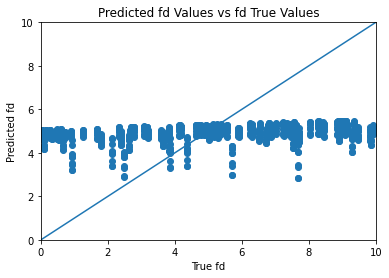

In [4]:
plt.scatter(tfdv, pv["fd"])
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.plot([0, 10], [0, 10])
plt.title("Predicted fd Values vs fd True Values")
plt.xlabel("True fd")
plt.ylabel("Predicted fd")
plt.show()

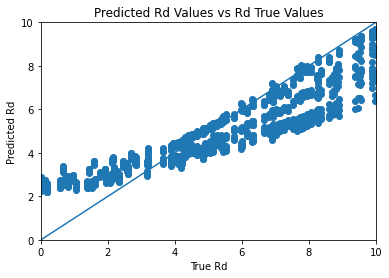

In [5]:
plt.scatter(tRdv, pv["Rd"])
plt.title("Predicted Rd Values vs Rd True Values")
plt.xlabel("True Rd")
plt.ylabel("Predicted Rd")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.plot([0,10],[0,10])
plt.show()

In [6]:
tfdv_flat = tfdv.to_numpy().flatten()
pfdv_flat = pv["fd"].to_numpy().flatten()
tRdv_flat = tRdv.to_numpy().flatten()
pRdv_flat = pv["Rd"].to_numpy().flatten()

def cos_dis(u, v):
    return (1 - np.dot(u, v)/(np.linalg.norm(u)*np.linalg.norm(v)))

In [7]:
#scipy.spatial.distance.cosine(tfdv_flat, pfdv_flat)

In [8]:
from sklearn import metrics

binned_pfdv = pfdv_flat.reshape(-1, 10)
binned_tfdv = tfdv_flat.reshape(-1, 10)

cor_cos_dis = np.zeros(binned_pfdv.shape[0])
for i in range(binned_pfdv.shape[0]):
     cor_cos_dis[i] = (cos_dis(binned_pfdv[i], binned_tfdv[i]))

cor_cos_dis[0]

0.00044798006274304747

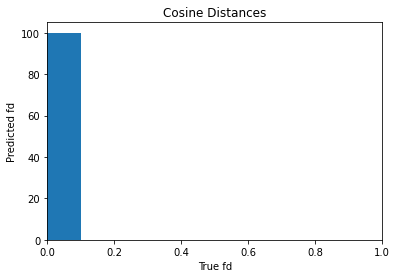

In [9]:
plt.hist(cor_cos_dis, bins=np.arange(0, 10, 0.1), histtype='stepfilled')
plt.title("Cosine Distances")
plt.xlabel("True fd")
plt.ylabel("Predicted fd")
plt.xlim(0, 1)
plt.show()

In [10]:
binned_pRdv = pRdv_flat.reshape(-1, 10)
binned_tRdv = tRdv_flat.reshape(-1, 10)

cor_cos_dis = np.zeros(binned_pRdv.shape[0])
for i in range(binned_pRdv.shape[0]):
     cor_cos_dis[i] = (cos_dis(binned_pRdv[i], binned_tRdv[i]))

cor_cos_dis[0]

0.001392606883657832

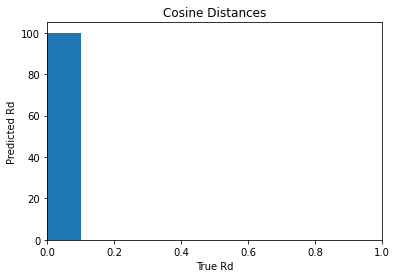

In [11]:
plt.hist(cor_cos_dis, bins=np.arange(0, 10, 0.1), histtype='stepfilled')
plt.title("Cosine Distances")
plt.xlabel("True Rd")
plt.ylabel("Predicted Rd")
plt.xlim(0, 1)
plt.show()

In [12]:
y = (np.histogram(cor_cos_dis, np.arange(0, 1.1, 0.1), weights=np.full(cor_cos_dis.shape, 1 / cor_cos_dis.shape[0]))[0])
x = np.arange(0.05, 1.05, 0.1)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


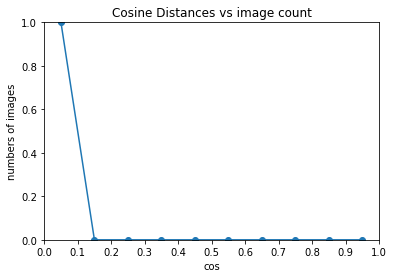

In [13]:
print(x)
print(y)
plt.scatter(x, y)
plt.plot(x, y)
plt.title("Cosine Distances vs image count")
plt.xlabel("cos")
plt.ylabel("numbers of images")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()

In [14]:
cos_dis_arr = np.zeros(pfdv_flat.shape[0])

pv_arr = pv.to_numpy()
cv_arr = np.c_[tfdv_flat, tRdv_flat]

for i in range(pfdv_flat.shape[0]):
     cos_dis_arr[i] = (cos_dis(cv_arr[i] ,pv_arr[i]))
cos_dis_arr[10]

0.0269144991742285

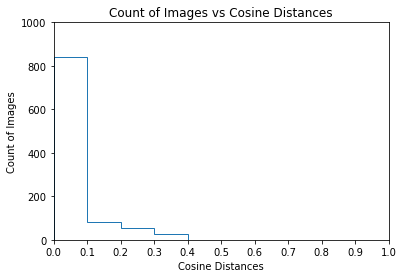

In [15]:
plt.hist(cos_dis_arr, bins=np.arange(0, 10, 0.1), histtype='step')
plt.title("Count of Images vs Cosine Distances")
plt.ylabel("Count of Images")
plt.xlabel("Cosine Distances")
plt.xlim(0, 1)
plt.ylim(0, 1000)
plt.xticks(np.arange(0, 1 + 0.1, 0.1))
plt.show()